In [30]:
import os
import sys
import glob
import shutil
import pickle
import random
import numpy as np
from random import shuffle
from sklearn.model_selection import train_test_split

In [47]:
def ttv_split_list(PATH, save_loc, valid_frac, test_frac):
    random.seed(101)
    all_files = glob.glob(PATH+'/**/*.png', recursive=True)
    shuffle(all_files)
    num = len(all_files)
    
    files = {}
    files['train'] = all_files[0:int(num*(1-test_frac-valid_frac))]
    files['test'] = all_files[int(num*(1-test_frac-valid_frac)):int(num*(1-valid_frac))]
    files['valid'] = all_files[int(num*(1-valid_frac)):]
    if not os.path.exists(save_loc):
        os.makedirs(save_loc)
    pickle.dump(files, open(os.path.join(save_loc, 'ttv_key.pkl'), "wb" ))
    return files


def ttv_split_list_move(PATH_OUT, get_file_class, file_ttv_split):
    for ttv_dir, file_list in file_ttv_split.items():
        for file in file_list:
            class_name = get_file_class(file)
            new_loc = os.path.join(PATH_OUT, ttv_dir, class_name)
            if not os.path.exists(new_loc):
                os.makedirs(new_loc)
            shutil.copyfile(file, os.path.join(new_loc, file.rsplit('/')[-1]))

            
def get_file_class(file):
    file_class = file.rsplit('.')[-2][-1]
    return file_class


def make_sample_dataset(data_loc, new_loc, frac, ttv_folders=['train', 'test', 'valid']):
    """ttv_folders are the names of test, train, valid folders. Assume already in fastai folder format"""   
    for folder in ttv_folders:
        classes = [name for name in os.listdir(os.path.join(data_loc, folder)) if os.path.isdir(os.path.join(data_loc, folder, name))]
        # go through classes, make output directory, copy a sample of image to this
        for class_name in classes:
            curr_path = os.path.join(data_loc, folder, class_name)
            out_path = os.path.join(new_loc, folder, class_name)
            if not os.path.exists(out_path):
                os.makedirs(out_path)
                
            files = glob.glob(curr_path + '/*.png')
            sample_files = random.sample(files, int(len(files)*frac))
            for file_to_copy in sample_files:
                shutil.copyfile(file_to_copy, os.path.join(new_loc, folder, class_name, file_to_copy.rsplit('/')[-1]))

In [43]:
PATH = '/media/rene/Data/data/idc_raw'
PATH_OUT = '/media/rene/Data/data/idc'
save_loc = '/media/rene/Data/data/idc/'
valid_frac = .15
test_frac = .15
sample_frac = .1
SAMPLE_PATH = '/media/rene/Data/data/idc/sample'

# file_ttv_split = ttv_split_list(PATH, save_loc, valid_frac, test_frac)
# ttv_split_list_move(PATH_OUT, get_file_class, file_ttv_split)
# make_sample_dataset(PATH_OUT, SAMPLE_PATH, sample_frac)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



/media/rene/Data/data/idc/train/1/12880_idx5_x1501_y2001_class1.png
(50, 50, 3)


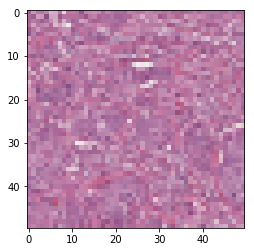

In [23]:
from PIL import Image

neg_loc = '/media/rene/Data/data/idc/train/0'
pos_loc = '/media/rene/Data/data/idc/train/1'

img_loc = glob(pos_loc+'/**/*.png', recursive=True)[0]
print(img_loc)

img = Image.open(img_loc)
# img.load()
img = np.asarray(img, dtype="int32")
print(img.shape)

plt.imshow(img)

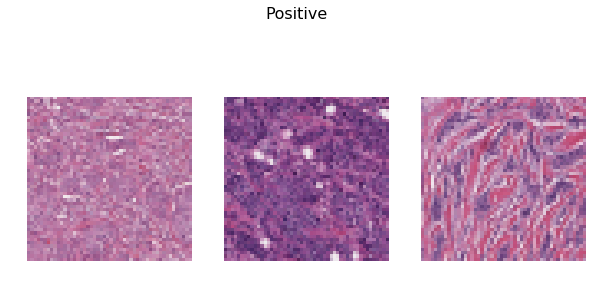

In [17]:
from fastai.conv_learner import *
from fastai.plots import *

pos_files = glob(pos_loc+'/**/*.png', recursive=True)[0:3]
neg_files = glob(neg_loc+'/**/*.png', recursive=True)[0:3]

plots_from_files(pos_files, maintitle="Positive")

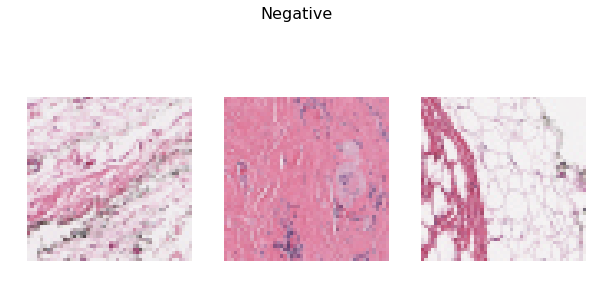

In [18]:
plots_from_files(neg_files, maintitle="Negative")